In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import sklearn.linear_model as skl_lm
import matplotlib.pyplot as plt
import statsmodels.api as sm_api
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import statsmodels.discrete.discrete_model as sm_discrete

In [107]:
df = pd.read_excel("Default1.xlsx")

In [108]:
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,Yes,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [109]:
df.tail()

,Unnamed: 0,default,student,balance,income
9995,9996,No,No,711.555020,52992.378914
9996,9997,No,No,757.962918,19660.721768
9997,9998,No,No,845.411989,58636.156984
9998,9999,No,No,1569.009053,36669.112365
9999,10000,No,Yes,200.922183,16862.952321


In [110]:
df.describe()

,Unnamed: 0,balance,income
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,835.374886,33516.981876
std,2886.89568,483.714985,13336.639563
min,1.00000,0.000000,771.967729
25%,2500.75000,481.731105,21340.462903
50%,5000.50000,823.636973,34552.644802
75%,7500.25000,1166.308386,43807.729272
max,10000.00000,2654.322576,73554.233495


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


In [112]:
df.shape

(10000, 5)

In [113]:
df.isnull().sum()

Unnamed: 0    0
default       0
student       0
balance       0
income        0
dtype: int64

In [114]:
df.describe(include="all")

,Unnamed: 0,default,student,balance,income
count,10000.00000,10000,10000,10000.000000,10000.000000
unique,NaN,2,2,NaN,NaN
top,NaN,No,No,NaN,NaN
freq,NaN,9667,7055,NaN,NaN
mean,5000.50000,NaN,NaN,835.374886,33516.981876
std,2886.89568,NaN,NaN,483.714985,13336.639563
min,1.00000,NaN,NaN,0.000000,771.967729
25%,2500.75000,NaN,NaN,481.731105,21340.462903
50%,5000.50000,NaN,NaN,823.636973,34552.644802
75%,7500.25000,NaN,NaN,1166.308386,43807.729272


In [115]:
(df.balance==0).sum(axis=0)

499

In [116]:
df.student.value_counts()

student
No     7055
Yes    2945
Name: count, dtype: int64

In [117]:
df.default.value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

In [118]:
df["default2"]=df.default.factorize()[0]

In [119]:
df["student2"]=df.student.factorize()[0]

In [120]:
df.head(3)

,Unnamed: 0,default,student,balance,income,default2,student2
0,1,No,Yes,729.526495,44361.625074,0,0
1,2,No,Yes,817.180407,12106.134700,0,0
2,3,No,No,1073.549164,31767.138947,0,1


In [121]:
df_dfno=df[df.default2==0].sample(frac=0.15)

In [122]:
df_dftypes=df[df.default2==1]

In [123]:
df_df = pd.concat([df_dfno, df_dftypes])

C:\Users\karav\AppData\Local\Temp\ipykernel_7344\1355545124.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default', y='balance', data=df, orient='v', ax=ax2, palette=c_palette)
C:\Users\karav\AppData\Local\Temp\ipykernel_7344\1355545124.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default', y='income', data=df, orient='v', ax=ax3, palette=c_palette)


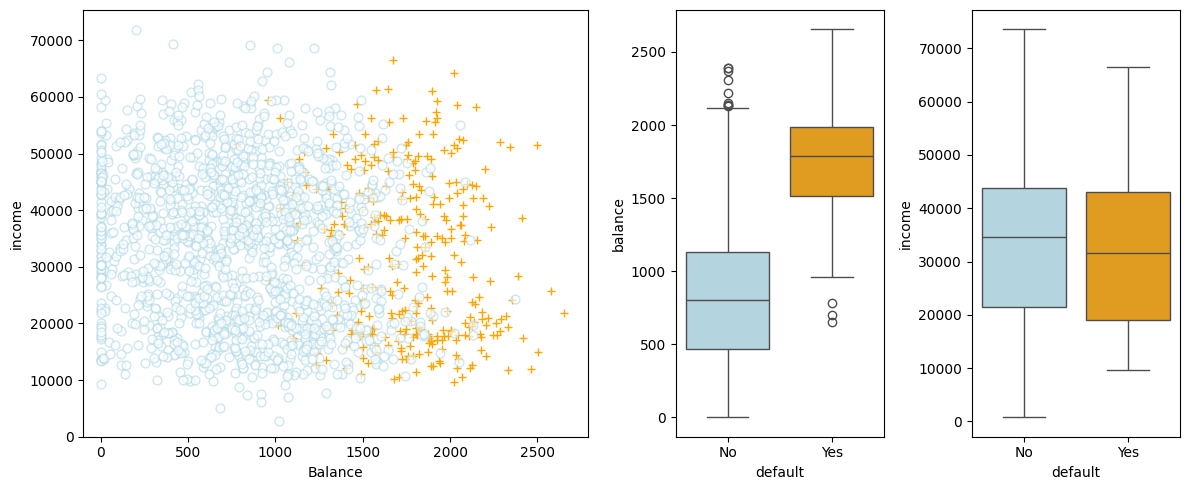

In [124]:
fig=plt.figure(figsize=(12,5))
gs=mpl.gridspec.GridSpec(1,4)
ax1=plt.subplot(gs[0,:2])
ax2=plt.subplot(gs[0,2:3])
ax3=plt.subplot(gs[0,3:4])
ax1.scatter(df_df[df_df.default=="Yes"].balance,df_df[df_df.default=="Yes"].income,s=40,c="Orange",marker="+",linewidths=1)
ax1.scatter(df_df[df_df.default=="No"].balance,df_df[df_df.default=="No"].income,s=40,marker="o",linewidths=1,edgecolors="lightBlue",facecolor="white",alpha=.6)
ax1.set_ylim(ymin=0)
ax1.set_ylabel("income")
ax1.set_xlim(xmin=-100)
ax1.set_xlabel("Balance")
c_palette={'No':'lightblue','Yes':'orange'}
sns.boxplot(x='default', y='balance', data=df, orient='v', ax=ax2, palette=c_palette)
sns.boxplot(x='default', y='income', data=df, orient='v', ax=ax3, palette=c_palette)
gs.tight_layout(plt.gcf())


In [125]:
x_train = df.balance.values.reshape(-1, 1)
y = df.default2
x_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1, 1)


In [126]:
clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(x_train,y)
prob=clf.predict_proba(x_test)

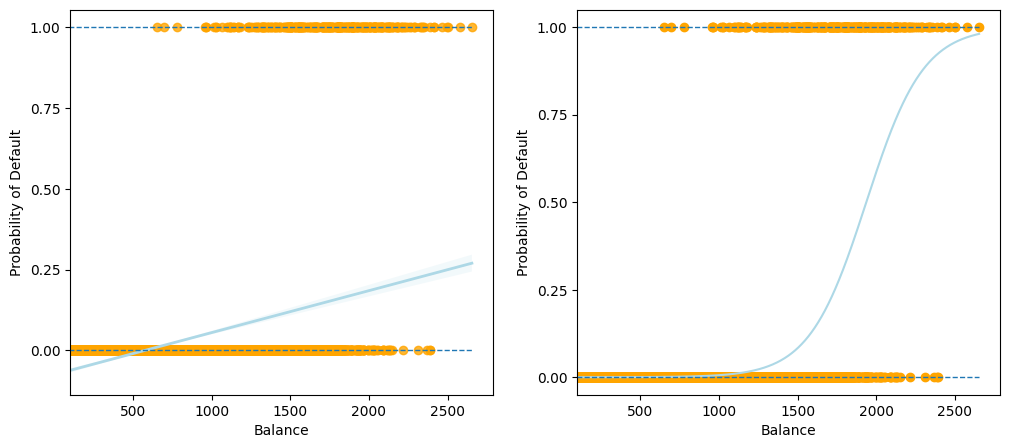

In [127]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.regplot(x=df.balance, y=df.default2, order=1, ax=ax1, scatter=True, scatter_kws={'color': 'orange'}, line_kws={'color': 'lightblue', 'lw': 2})
ax2.scatter(x_train, y, color='orange')     
ax2.plot(x_test, prob[:, 1], color='lightblue')
for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0], xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0], xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_ylabel("Probability of Default")
    ax.set_xlabel("Balance")
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_xlim(xmin=100)


In [128]:
print(clf)
print('Classes : ',clf.classes_)
print('Corfficients : ',clf.coef_)
print('Intercept :', clf.intercept_)

LogisticRegression(solver='newton-cg')
Classes :  [0 1]
Corfficients :  [[0.00549892]]
Intercept : [-10.65133019]


In [129]:
x_train = sm_api.add_constant(df.balance)
est = sm_api.Logit(y, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


In [130]:
est.summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.651331,0.361169,-29.491287,3.723665e-191,-11.359208,-9.943453
balance,0.005499,0.000220,24.952404,2.010855e-137,0.005067,0.005931


In [131]:
x_train = sm_api.add_constant(df.student2)
y = df.default2
est = sm_discrete.Logit(y, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.145436
         Iterations 7


In [132]:
summary = est.summary()
print(summary.tables[1].as_text())

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0996      0.091    -34.169      0.000      -3.277      -2.922
student2      -0.4044      0.115     -3.516      0.000      -0.630      -0.179


In [133]:
x_train = sm_api.add_constant(df[['balance', 'income', 'student2']])
est = sm_discrete.Logit(y, x_train).fit()
print(est.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5158      0.438    -26.299      0.000     -12.374     -10.658
balance        0.0057      0.000     24.736      0.000       0.005       0.006
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student2       0.6468      0.236      2.738      0.006       0.184       1.110


In [134]:
x_train = df[df.student == 'Yes'].balance.values.reshape(-1,1)
y = df[df.student == 'Yes'].default2
x_train2 = df[df.student == 'No'].balance.values.reshape(-1,1)
y2 = df[df.student == 'No'].default2
x_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)

In [135]:
clf = skl_lm.LogisticRegression(solver='newton-cg')
clf2 = skl_lm.LogisticRegression(solver='newton-cg')  
clf.fit(x_train, y)     
clf2.fit(x_train2, y2)  
prob = clf.predict_proba(x_test)
prob2 = clf2.predict_proba(x_test) 

In [136]:
df.groupby(['student', 'default']).size().unstack('default')

default,No,Yes
student,,
No,6849,206
Yes,2818,127


C:\Users\karav\AppData\Local\Temp\ipykernel_7344\1651911311.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='student', y='balance', data=df, orient='v', ax=ax2, palette=c_palette)


<Axes: xlabel='student', ylabel='balance'>

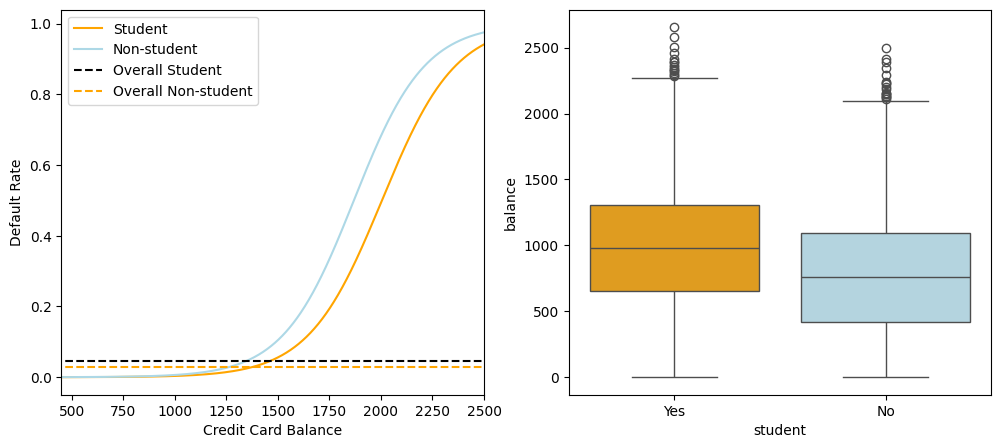

In [137]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(x_test, prob[:,1],color='orange', label='Student')
ax1.plot(x_test, prob2[:,1],color='lightblue', label='Non-student')
ax1.hlines(127/2817, colors='k',label='Overall Student', xmin=ax1.xaxis.get_data_interval()[0],xmax=ax1.xaxis.get_data_interval()[1],linestyles='dashed')
ax1.hlines(206/6850, colors='orange',label='Overall Non-student', xmin=ax1.xaxis.get_data_interval()[0],xmax=ax1.xaxis.get_data_interval()[1],linestyles='dashed')
ax1.set_ylabel('Default Rate')
ax1.set_xlabel('Credit Card Balance')     
ax1.set_yticks([0,0.2, 0.4, 0.6, 0.8, 1])
ax1.set_xlim(450,2500)
ax1.legend(loc=2)

# right plot
sns.boxplot(x='student', y='balance', data=df, orient='v', ax=ax2, palette=c_palette)

In [138]:
x = df[['balance', 'income', 'student2']] 
y = df.default2   
lda = LinearDiscriminantAnalysis(solver='svd')  
y_pred = lda.fit(x, y).predict(x)   
ccdef_df= pd.DataFrame({'True default status': y, 'Predicted default status': y_pred})   

In [139]:
ccdef_df.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)      
ccdef_df.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,No,Yes
Predicted default status,,
No,9645,254
Yes,22,79


In [141]:
decision_prob = 0.2
y_prob = lda.fit(x, y).predict_proba(x) 
ccdef_df = pd.DataFrame({'True default status': y, 'Predicted default status': y_prob[:,1] > decision_prob})
ccdef_df.replace(to_replace={0:'No', 1:'Yes','True':'Yes','False':'No'}, inplace=True) 

In [142]:
ccdef_df.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,No,Yes
Predicted default status,,
False,9435,140
True,232,193
